## Twitter data exploration

data source: How ISIS Uses Twitter - catch on sailfish for the hackathon

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#from __future__ import print_function #if using python 2
import numpy as np
import pandas as pd

Read in the data

In [2]:
df=pd.read_csv('tweets.csv')

In [3]:
df.head(5)

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...


### Quick exploration of tweets using the time stamp

In [4]:
#convert column to pandas datetime
df['time'] = pd.to_datetime(df['time'])

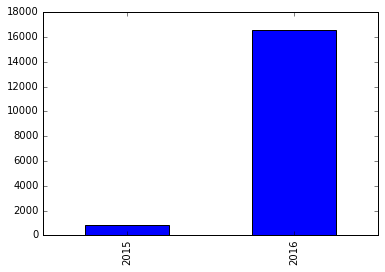

In [5]:
#what years do we have and how many tweets per year?
df['time'].dt.year.value_counts().sort_index().plot(kind='bar')

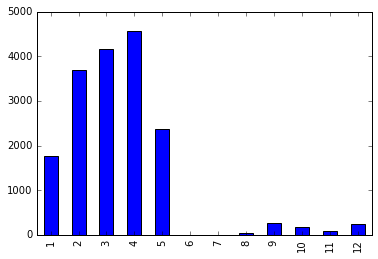

In [6]:
#do certain months get more tweets that others?
df['time'].dt.month.value_counts().sort_index().plot(kind='bar')

In [7]:
#idea: throw out 2015 data and see if certain events that occurred in 2016 caused the spike in Jan-May

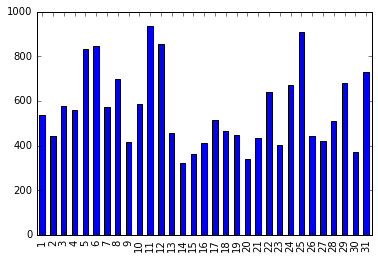

In [8]:
#a look at days of the month
df['time'].dt.day.value_counts().sort_index().plot(kind='bar')

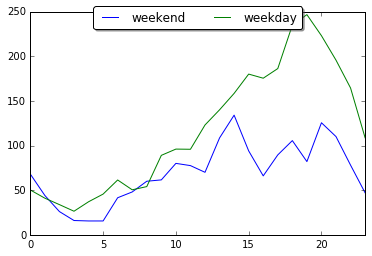

In [153]:
#what about weekday vs weekend?
(df[(df.time.dt.dayofweek>=5)].time.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.time.dt.dayofweek<5)].time.dt.hour.value_counts()/5).sort_index().plot()

plt.legend(['weekend','weekday'],loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

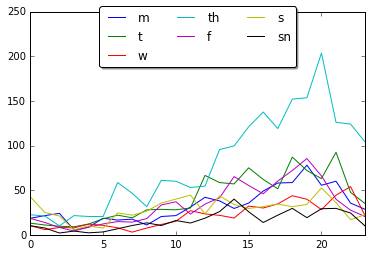

In [154]:
#what about day of the week?
#not sure what timezone these hours are in or why Thurs at 10pm is the highest...could be from one user or one event?
(df[(df.time.dt.dayofweek==0)].time.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.time.dt.dayofweek==1)].time.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.time.dt.dayofweek==2)].time.dt.hour.value_counts()/5).sort_index().plot()
(df[(df.time.dt.dayofweek==3)].time.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.time.dt.dayofweek==4)].time.dt.hour.value_counts()/5).sort_index().plot()
(df[(df.time.dt.dayofweek==5)].time.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.time.dt.dayofweek==6)].time.dt.hour.value_counts()/5).sort_index().plot()

plt.legend(['m','t','w','th','f','s','sn'],loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

### Quick exploration of tweets using the location

In [168]:
df['location'].value_counts()

Read my blog                                     1475
world                                            1191
Worldwide contributions                           998
Texas, USA                                        993
اُمتِ مُسلمہ ولایت کشمیر                          709
United States                                     587
28th Street, Qamar Precint                        426
Germany                                           397
Dunya                                             366
Male'. Maldives.                                  333
S.Wazirstan|Mahsud not a Wazir                    318
Middle of Nowhere                                 303
dar al-kufr                                       285
Nowhere                                           234
Wilayah Kashmir                                   231
München, Deutschland                              193
Bandar Seri Begawan, Negara Brunei Darussalam     182
Geneva, Switzerland                               166
Ghurabā                     

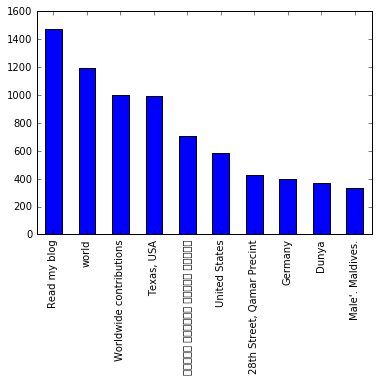

In [169]:
#top 10 locations
df['location'].value_counts().sort_values(ascending=0)[:10].plot(kind='bar')

## Idea: do some cool things with NLTK
### (Natural Language Toolkit)
http://www.nltk.org/

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
#declare list of words to remove
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'english', 'translation:'] 

In [10]:
df['tweets'] = df['tweets'].str.lower().str.split()
df['tweets']= df['tweets'].apply(lambda x: [item for item in x if item not in stop])

In [11]:
#what is the length of the longest tweet?
print (df.tweets.map(lambda x: len(x)).max())

30


In [12]:
#make a column to count number of words in each tweet
df['word_count']=df.tweets.map(lambda x: len(x))

In [13]:
#print one tweet
df['tweets'][48]

['@abuyaqub6:',
 '@alwalawalbara12:',
 'may',
 'allah',
 'punish',
 'every',
 'shiite',
 'https://t.co/y1wwfrjdtp/s/aqau']

In [14]:
df.tail(5)

,name,username,description,location,followers,numberstatuses,time,tweets,word_count
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:46:00,"[#breaking, #islamicstate, #amaqagency, #frida...",6
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:50:00,"[#breaking, iraqi, forces, bulldozer, destroye...",14
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:51:00,"[#breaking, #amaqagency, #islamicstate, #easto...",5
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 16:07:00,"[#photoreport, #wilayatdimasiqh, 📷the, conduct...",10
17409,one who believes,ro34th,"Torah Observant, follower of the Prophet Yeshu...",dar al-kufr,1482,33091,2016-05-13 16:10:00,"[#amaqagency, destroyed, burning, iraqi, force...",11


## idea: do a sentiment analysis and calculate polarity and sentiment scores

### ps. Text Blob may be easier to use than NLTK: https://textblob.readthedocs.io/en/dev/